In [76]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import pathlib
import itertools
import pandas.util.testing as tm
import statsmodels.api as sm
from statsmodels.iolib.summary2 import summary_col
from statsmodels.sandbox.regression.predstd import wls_prediction_std
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression


%matplotlib inline

In [17]:
url = 'https://raw.githubusercontent.com/glaucioporto/Saneamento/master/Modelo0909_custo_v4.csv'

In [18]:
df = pd.read_csv(url, sep = ';', encoding='latin-1')
df.head()

,ï»¿c_mun,un,ano,c_prest,t_Serv,nat_jur_c,FN017,nat_jur_b,Urbanizacao,AG005,AG011,AG021,QD023,IN008,IN013,IN058
0,120040,AC,2004,12004011,1,0,16.07,0,89,6.31,8.61,11.00,8.71,9.90,73.80,-0.82
1,120040,AC,2003,12004011,1,0,15.81,0,89,6.31,8.62,10.97,7.28,9.70,75.24,-0.84
2,270020,AL,2004,27043000,0,1,13.55,0,51,2.70,5.63,7.70,2.30,10.01,44.56,-0.02
3,270020,AL,2003,27043000,0,1,13.22,0,51,2.70,5.61,7.66,6.22,9.98,45.92,0.04
4,270030,AL,2004,27043000,0,1,16.40,0,82,6.33,8.70,10.69,6.99,10.17,16.62,0.94


In [19]:
df.shape

(44888, 16)

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44888 entries, 0 to 44887
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ï»¿c_mun     44888 non-null  int64  
 1   un           44888 non-null  object 
 2   ano          44888 non-null  int64  
 3   c_prest      44888 non-null  int64  
 4   t_Serv       44888 non-null  int64  
 5   nat_jur_c    44888 non-null  int64  
 6   FN017        44888 non-null  float64
 7   nat_jur_b    44888 non-null  int64  
 8   Urbanizacao  44888 non-null  int64  
 9   AG005        44888 non-null  float64
 10  AG011        44888 non-null  float64
 11  AG021        44888 non-null  float64
 12  QD023        44888 non-null  float64
 13  IN008        44888 non-null  float64
 14  IN013        44885 non-null  float64
 15  IN058        44888 non-null  float64
dtypes: float64(8), int64(7), object(1)
memory usage: 5.5+ MB


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fcb72f11780>,
      dtype=object)

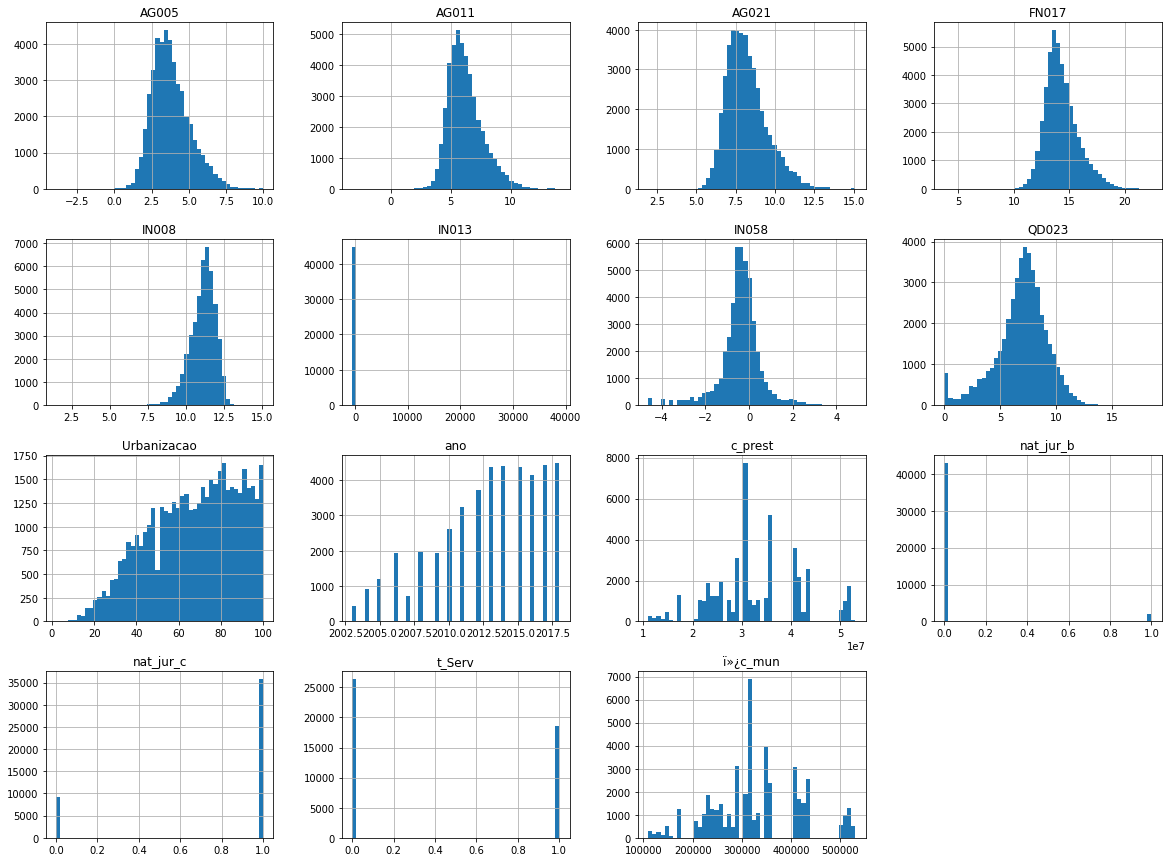

In [21]:
df.hist(bins=50, figsize=(20,15))

In [22]:
# Analisando outros campos e descrição dos atributos numéricos
df.describe()

,ï»¿c_mun,ano,c_prest,t_Serv,nat_jur_c,FN017,nat_jur_b,Urbanizacao,AG005,AG011,AG021,QD023,IN008,IN013,IN058
count,44888.000000,44888.000000,4.488800e+04,44888.000000,44888.000000,44888.000000,44888.000000,44888.000000,44888.000000,44888.000000,44888.000000,44888.000000,44888.000000,44885.000000,44888.000000
mean,328598.806407,2012.769382,3.283853e+07,0.413429,0.796271,14.294791,0.043174,67.330021,3.810003,6.238426,8.207433,6.926353,11.127406,24.089907,-0.396591
std,89731.295565,3.884229,8.967209e+06,0.492454,0.402774,1.511234,0.203251,21.113977,1.280875,1.438032,1.287172,2.275897,0.849198,189.029918,0.947934
min,110001.000000,2003.000000,1.100011e+07,0.000000,0.000000,3.730000,0.000000,2.000000,-3.910000,-3.220000,1.950000,0.000000,1.480000,-548.360000,-4.610000
25%,270070.000000,2010.000000,2.704300e+07,0.000000,1.000000,13.280000,0.000000,51.000000,2.890000,5.220000,7.280000,5.810000,10.650000,8.010000,-0.760000
50%,315540.000000,2013.000000,3.106200e+07,0.000000,1.000000,14.060000,0.000000,70.000000,3.640000,6.010000,8.020000,7.160000,11.230000,20.750000,-0.340000
75%,410720.000000,2016.000000,4.106900e+07,1.000000,1.000000,15.100000,0.000000,85.000000,4.540000,7.020000,8.920000,8.340000,11.710000,35.690000,0.050000
max,530010.000000,2018.000000,5.300100e+07,1.000000,1.000000,22.400000,1.000000,100.000000,9.990000,14.060000,15.100000,18.530000,15.090000,38788.450000,4.860000


In [23]:
df1_a = df.copy()
df1_a['Target'] = df1_a['FN017'].apply(lambda x:0 if x == 'No' else 1)
df1_a

,ï»¿c_mun,un,ano,c_prest,t_Serv,nat_jur_c,FN017,nat_jur_b,Urbanizacao,AG005,AG011,AG021,QD023,IN008,IN013,IN058,Target
0,120040,AC,2004,12004011,1,0,16.07,0,89,6.31,8.61,11.00,8.71,9.90,73.80,-0.82,1
1,120040,AC,2003,12004011,1,0,15.81,0,89,6.31,8.62,10.97,7.28,9.70,75.24,-0.84,1
2,270020,AL,2004,27043000,0,1,13.55,0,51,2.70,5.63,7.70,2.30,10.01,44.56,-0.02,1
3,270020,AL,2003,27043000,0,1,13.22,0,51,2.70,5.61,7.66,6.22,9.98,45.92,0.04,1
4,270030,AL,2004,27043000,0,1,16.40,0,82,6.33,8.70,10.69,6.99,10.17,16.62,0.94,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44883,172120,TO,2017,17210000,1,0,15.15,1,81,4.78,6.97,8.90,9.81,10.81,36.49,-1.11,1
44884,172208,TO,2018,17210000,0,0,13.66,1,53,3.74,5.92,8.00,8.96,11.21,18.92,-0.82,1
44885,172208,TO,2017,17210000,0,0,14.16,1,53,3.74,5.90,7.97,8.62,11.19,11.54,-0.71,1
44886,172210,TO,2018,17210000,0,0,14.32,1,85,3.61,6.24,8.13,9.28,10.96,1.40,-0.42,1


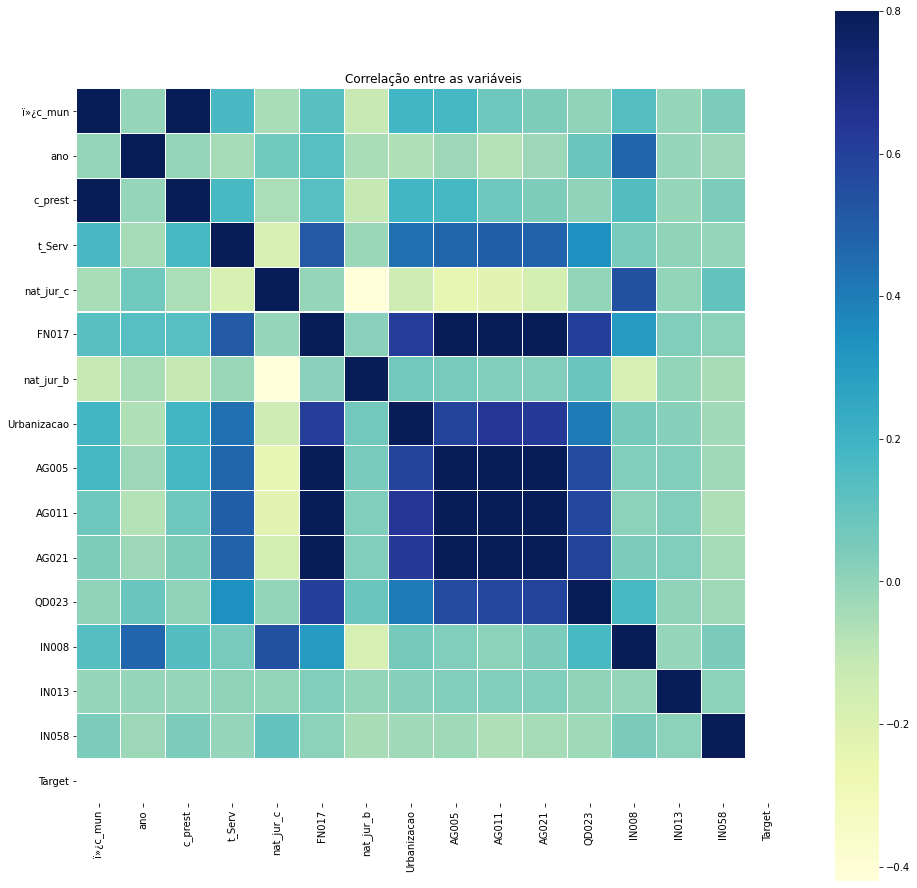

In [24]:
corr=df1_a.corr()
plt.figure(figsize=(16, 16))
sns.heatmap(corr, vmax=.8, linewidths=0.01,square=True,annot=False,cmap='YlGnBu',linecolor="white")
plt.title('Correlação entre as variáveis');

In [25]:
df1_a.corr()['FN017'].head(60)


ï»¿c_mun       0.130791
ano            0.133162
c_prest        0.132916
t_Serv         0.505313
nat_jur_c     -0.010022
FN017          1.000000
nat_jur_b      0.013766
Urbanizacao    0.610650
AG005          0.860645
AG011          0.893633
AG021          0.912938
QD023          0.608029
IN008          0.302806
IN013          0.029285
IN058          0.012487
Target              NaN
Name: FN017, dtype: float64

In [ ]:
df.groupby(['Gender']).Target.value_counts(normalize= True)

In [92]:
plt.figure(figsize=(15,8))
sns.kdeplot(df['DF017'][df.['nat_jur_b'] == 1], color='darkturquoise', shade = True)
sns.kdeplot(df1_a['DF017'][df.'nat_jur_b' == 0], color='lightcoral', shade = True)
plt.legend(['Empresa Privada', 'Ativo'])
plt.title('Gráfico de densidade de Custo por natureza jurídica')


SyntaxError: ignored

In [68]:
df017_x.head()

,t_Serv,nat_jur_c,nat_jur_b,Urbanizacao,AG005,AG011,AG021,QD023,IN008,IN013,IN058
0,1,0,0,89,6.31,8.61,11.00,8.71,9.90,73.80,-0.82
1,1,0,0,89,6.31,8.62,10.97,7.28,9.70,75.24,-0.84
2,0,1,0,51,2.70,5.63,7.70,2.30,10.01,44.56,-0.02
3,0,1,0,51,2.70,5.61,7.66,6.22,9.98,45.92,0.04
4,0,1,0,82,6.33,8.70,10.69,6.99,10.17,16.62,0.94


In [78]:
# Variável dependente FN017 (Custo)
df017 = df.dropna()
df017_x = df017.drop(['FN017','ano','c_prest','ï»¿c_mun','un'] ,axis = 1) 
df017b_x = df017_x.drop(['t_Serv','nat_jur_c'], axis = 1)
df017c_x = df017b_x.drop(['IN058', 'AG021', 'QD023'] ,axis = 1)
X = df017_x # Selects the features
X2 = df017b_x 
X3 = df017c_x 
y = df017['FN017'] # Selects the variable we want to predict - ok porque no teve exclusao de linhas

In [79]:
X.shape


(44885, 11)

In [80]:
y.shape

(44885,)

In [81]:
model = sm.OLS(y, X)
results = model.fit()
print(results.summary())

                                 OLS Regression Results                                
Dep. Variable:                  FN017   R-squared (uncentered):                   0.999
Model:                            OLS   Adj. R-squared (uncentered):              0.999
Method:                 Least Squares   F-statistic:                          4.235e+06
Date:                Thu, 10 Sep 2020   Prob (F-statistic):                        0.00
Time:                        20:53:19   Log-Likelihood:                         -27438.
No. Observations:               44885   AIC:                                  5.490e+04
Df Residuals:                   44874   BIC:                                  5.499e+04
Df Model:                          11                                                  
Covariance Type:            nonrobust                                                  
                  coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------

In [82]:
print(results.summary2())

                        Results: Ordinary least squares
Model:                  OLS              Adj. R-squared (uncentered): 0.999     
Dependent Variable:     FN017            AIC:                         54897.7980
Date:                   2020-09-10 20:53 BIC:                         54993.6284
No. Observations:       44885            Log-Likelihood:              -27438.   
Df Model:               11               F-statistic:                 4.235e+06 
Df Residuals:           44874            Prob (F-statistic):          0.00      
R-squared (uncentered): 0.999            Scale:                       0.19888   
------------------------------------------------------------------------------------
                  Coef.      Std.Err.        t         P>|t|       [0.025     0.975]
------------------------------------------------------------------------------------
t_Serv            0.1825       0.0051      35.9204     0.0000      0.1726     0.1925
nat_jur_c         0.0994       0.0069

In [83]:
print('Parameters: ', results.params)
print('R2: ', results.rsquared)

Parameters:  t_Serv         0.182541
nat_jur_c      0.099362
nat_jur_b      0.396238
Urbanizacao    0.001310
AG005          0.032703
AG011          0.170285
AG021          0.821390
QD023          0.007002
IN008          0.546030
IN013          0.000011
IN058          0.060159
dtype: float64
R2:  0.9990377010535699


In [ ]:
dir(results)


In [85]:
model = sm.OLS(y, X2)
results2 = model.fit()
print(results2.summary())

                                 OLS Regression Results                                
Dep. Variable:                  FN017   R-squared (uncentered):                   0.999
Model:                            OLS   Adj. R-squared (uncentered):              0.999
Method:                 Least Squares   F-statistic:                          5.021e+06
Date:                Thu, 10 Sep 2020   Prob (F-statistic):                        0.00
Time:                        20:53:27   Log-Likelihood:                         -28124.
No. Observations:               44885   AIC:                                  5.627e+04
Df Residuals:                   44876   BIC:                                  5.634e+04
Df Model:                           9                                                  
Covariance Type:            nonrobust                                                  
                  coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------

In [86]:
model = sm.OLS(y, X3)
results3 = model.fit()
print(results3.summary())

                                 OLS Regression Results                                
Dep. Variable:                  FN017   R-squared (uncentered):                   0.999
Model:                            OLS   Adj. R-squared (uncentered):              0.999
Method:                 Least Squares   F-statistic:                          5.461e+06
Date:                Thu, 10 Sep 2020   Prob (F-statistic):                        0.00
Time:                        20:53:29   Log-Likelihood:                         -35329.
No. Observations:               44885   AIC:                                  7.067e+04
Df Residuals:                   44879   BIC:                                  7.072e+04
Df Model:                           6                                                  
Covariance Type:            nonrobust                                                  
                  coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------

In [87]:
info_dict={'R-squared' : lambda x: f"{x.rsquared:.2f}",
           'No. observations' : lambda x: f"{int(x.nobs):d}"}

results_table = summary_col(results=[results,results2,results3],
                            float_format='%0.2f',
                            stars = True,
                            model_names=['Model 1',
                                         'Model 2',
                                         'Model 3'],
                            info_dict=info_dict)

results_table.add_title('Table 2 - OLS Regressions')

print(results_table)

       Table 2 - OLS Regressions
                 Model 1 Model 2 Model 3
----------------------------------------
AG005            0.03*** 0.04*** 0.16***
                 (0.00)  (0.00)  (0.00) 
AG011            0.17*** 0.20*** 0.82***
                 (0.01)  (0.01)  (0.00) 
AG021            0.82*** 0.79***        
                 (0.01)  (0.01)         
IN008            0.55*** 0.56*** 0.75***
                 (0.00)  (0.00)  (0.00) 
IN013            0.00    0.00    0.00***
                 (0.00)  (0.00)  (0.00) 
IN058            0.06*** 0.06***        
                 (0.00)  (0.00)         
QD023            0.01*** 0.01***        
                 (0.00)  (0.00)         
Urbanizacao      0.00*** 0.00*** 0.00***
                 (0.00)  (0.00)  (0.00) 
nat_jur_b        0.40*** 0.30*** 0.39***
                 (0.01)  (0.01)  (0.01) 
nat_jur_c        0.10***                
                 (0.01)                 
t_Serv           0.18***                
                 (0.01) 

In [62]:
logistic = LogisticRegression(random_state=42)
logistic.fit(X, y)

ValueError: ignored

In [58]:
rf017 = RandomForestClassifier( random_state=42)
rf017.fit(X, y)


ValueError: ignored

In [ ]:
result = sm.ols(formula="FN017 ~ B + C", data=df).fit()
print(result.params)